In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datp2020sets/train.csv
/kaggle/input/datp2020sets/test.csv


# Load datasets

In [2]:
import os
import pandas as pd
# Base directory where your dataset is stored
base_directory = '/kaggle/input/datp2020sets/train.csv'


# Load all CSV files from relevant weeks
dataframes = pd.read_csv(base_directory)



activity_counts = dataframes['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = dataframes['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)

Activity distribution:
Activity
Normal                  8855
Directory Bruteforce    8465
Account Bruteforce        91
SQL Injection             55
Account Discovery         12
CSRF                       7
Malware Download           2
Name: count, dtype: int64
Stage distribution:
Stage
Benign                8855
Establish Foothold    8588
Reconnaissance          44
Name: count, dtype: int64


### Data Shape

In [3]:
dataframes.shape

(17487, 85)

In [4]:
nan_count = dataframes.isnull().sum().sum()
print(nan_count)

0


### Data columns

In [5]:
dataframes.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

### Columns datatype

In [6]:
import pandas as pd

print(dataframes.dtypes.to_string())


Flow ID                        object
Src IP                         object
Src Port                        int64
Dst IP                         object
Dst Port                        int64
Protocol                        int64
Timestamp                      object
Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet    float64
Total Length of Bwd Packet    float64
Fwd Packet Length Max         float64
Fwd Packet Length Min         float64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max         float64
Bwd Packet Length Min         float64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                  float64
Flow IAT Min                  float64
Fwd IAT Tota

### Targeted Label.

In [7]:
Y = dataframes['Stage'].apply(lambda x: 'Non-APT' if x == 'Benign' else 'APT')

# Check the distribution of the new label
print(Y.value_counts())

Stage
Non-APT    8855
APT        8632
Name: count, dtype: int64


### Encoding Targeted Label.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = Y.values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[1 1 1 ... 0 1 0]


### Investing timestamp data.

In [9]:
dataframes["Timestamp"].nunique()

4227

### Feature Extraction with `Timestamp`

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Convert the 'Timestamp' column to datetime
dataframes['Timestamp'] = pd.to_datetime(dataframes['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Extracting features from the datetime
dataframes['Year'] = dataframes['Timestamp'].dt.year
dataframes['Month'] = dataframes['Timestamp'].dt.month
dataframes['Day'] = dataframes['Timestamp'].dt.day
dataframes['Hour'] = dataframes['Timestamp'].dt.hour
dataframes['Minute'] = dataframes['Timestamp'].dt.minute
dataframes['Second'] = dataframes['Timestamp'].dt.second


# Selecting the columns to normalize
features_to_normalize = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the features
# df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# # Now df contains the normalized features which can be fed into your model
# print(df.head())

dtimestamp = dataframes[features_to_normalize]
dtimestamp


,Year,Month,Day,Hour,Minute,Second
0,2019,7,17,14,35,9
1,2019,7,17,14,33,27
2,2019,7,17,14,35,41
3,2019,7,17,14,36,21
4,2019,7,17,14,35,41
...,...,...,...,...,...,...
17482,2019,7,17,15,57,25
17483,2019,7,17,18,21,41
17484,2019,7,17,15,58,15
17485,2019,7,17,16,24,43


In [11]:
dtimestamp.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], dtype='object')

### IP feature conversion

In [12]:
import pandas as pd
import numpy as np
import ipaddress
# import category_encoders as ce

# Sample DataFrame for demonstration
# df_cleaned = pd.read_csv('your_dataset.csv')  # Assuming you load your data this way
non_numeric_columns = ["Src IP","Dst IP","Timestamp"]

# List of non-numeric columns

# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip = dataframes[["Src IP", "Dst IP"]].copy()

# Apply the function to IP columns
df_ip['Src IP'] = df_ip['Src IP'].apply(validate_and_convert_ip)
df_ip['Dst IP'] = df_ip['Dst IP'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip['Src IP'].fillna(-1, inplace=True)
df_ip['Dst IP'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = dataframes[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip

/tmp/ipykernel_34/1021049291.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip['Src IP'].fillna(-1, inplace=True)
/tmp/ipykernel_34/1021049291.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,Src IP,Dst IP
0,0.752564,0.093188
1,0.752564,0.203627
2,0.752564,0.090648
3,0.752564,0.090648
4,0.752564,0.139262
...,...,...
17482,0.807849,0.752564
17483,0.752564,0.031373
17484,0.807849,0.752564
17485,0.752564,0.031373


### Eliminating correlated numeric features.

In [13]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_cleaned_corr = dataframes.drop(columns=["Flow ID","Src IP","Dst IP","Timestamp" , "Activity" , "Stage" ])
correlation_matrix = df_cleaned_corr.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than threshold (e.g., 0.95)
threshold = 0.95
correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop correlated features
df_uncorrelated = df_cleaned_corr.drop(columns=correlated_features)

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_uncorrelated.shape)

Shape of DataFrame after dropping correlated features: (17487, 62)


### Veiw uncorrelated features.

In [14]:
df_uncorrelated.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Packets/s', 'Packet Length Min', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWR Flag Count', 'Down/Up Ratio',
       'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',
       'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk A

### Combine features.

In [15]:
# Combine the encoded IP and non-IP columns with other numeric features
X = pd.concat([df_ip, dtimestamp, df_uncorrelated], axis=1)

# Check the resulting dataframe
X.head()

,Src IP,Dst IP,Year,Month,Day,Hour,Minute,Second,Src Port,Dst Port,...,Active Mean,Active Std,Active Min,Idle Std,Year,Month,Day,Hour,Minute,Second
0,0.752564,0.093188,2019,7,17,14,35,9,55438,80,...,15786.000000,0.000000,15786.0,0.000000,2019,7,17,14,35,9
1,0.752564,0.203627,2019,7,17,14,33,27,43846,443,...,0.000000,0.000000,0.0,0.000000,2019,7,17,14,33,27
2,0.752564,0.090648,2019,7,17,14,35,41,48386,443,...,277958.000000,0.000000,277958.0,0.000000,2019,7,17,14,35,41
3,0.752564,0.090648,2019,7,17,14,36,21,48386,443,...,0.000000,0.000000,0.0,0.000000,2019,7,17,14,36,21
4,0.752564,0.139262,2019,7,17,14,35,41,36318,443,...,58797.166667,41584.018533,41653.0,356527.496757,2019,7,17,14,35,41


### Data Standardizing.

In [16]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
X_scaled.head()

,Src IP,Dst IP,Year,Month,Day,Hour,Minute,Second,Src Port,Dst Port,...,Active Mean,Active Std,Active Min,Idle Std,Year,Month,Day,Hour,Minute,Second
0,0.889422,0.082435,0.0,0.0,0.0,0.0,0.593220,0.152542,0.847261,0.001223,...,0.000492,0.000000,0.000492,0.000000,0.0,0.0,0.0,0.0,0.593220,0.152542
1,0.889422,0.194184,0.0,0.0,0.0,0.0,0.559322,0.457627,0.670100,0.006770,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.559322,0.457627
2,0.889422,0.079865,0.0,0.0,0.0,0.0,0.593220,0.694915,0.739485,0.006770,...,0.008671,0.000000,0.008671,0.000000,0.0,0.0,0.0,0.0,0.593220,0.694915
3,0.889422,0.079865,0.0,0.0,0.0,0.0,0.610169,0.355932,0.739485,0.006770,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.610169,0.355932
4,0.889422,0.129055,0.0,0.0,0.0,0.0,0.593220,0.694915,0.555050,0.006770,...,0.001834,0.001676,0.001299,0.008052,0.0,0.0,0.0,0.0,0.593220,0.694915


In [18]:
type(X_scaled)

pandas.core.frame.DataFrame

### Reshaping data.

In [19]:
# Reshape data
X_resampled_np = X_scaled.to_numpy()
X_resampled_np = np.expand_dims(X_resampled_np, axis=2)  # Reshape to (samples, timesteps, features)

In [20]:
type(X_resampled_np)

numpy.ndarray

In [21]:
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def create_bilstm_cnn_model(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Bi-LSTM branch
    lstm_output = LSTM(64, return_sequences=True)(input_layer)
    lstm_output = Dropout(0.5)(lstm_output)
    lstm_output = LSTM(32)(lstm_output)
    lstm_output = Dropout(0.5)(lstm_output)

    # CNN branch
    cnn_output = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    cnn_output = MaxPooling1D(pool_size=2)(cnn_output)
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dense(32, activation='relu')(cnn_output)
    cnn_output = Dropout(0.5)(cnn_output)

    # Combine LSTM and CNN branches
    combined = Concatenate()([lstm_output, cnn_output])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(1, activation='sigmoid')(combined)

    model = Model(inputs=input_layer, outputs=output)
    return model


n_samples, n_timesteps, n_features = X_resampled_np.shape

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
histories = []
best_accuracy = 0
best_history = None

# Training and evaluation
for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_resampled_np[train_index], X_resampled_np[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Create and compile the model
    model = create_bilstm_cnn_model((n_timesteps, n_features))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Define the checkpoint callback to save the best model during training
    checkpoint_path = '/kaggle/working/best_model.keras'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False)

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[EarlyStopping(patience=5), checkpoint]
    )
    
    histories.append(history)

    # Load the best model
    best_model = load_model(checkpoint_path)
    
    ## New added
    # Evaluate the best model on the validation data
    results = best_model.evaluate(X_val, Y_val, verbose=0)
    accuracy = results[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_history = history
        
    accuracy_scores.append(accuracy)
    ## New added

    # Evaluate the best model on the validation data
    # results = best_model.evaluate(X_val, Y_val, verbose=0)
    # accuracy_scores.append(results[1])

    # Predictions
    Y_pred = best_model.predict(X_val)
    Y_pred = (Y_pred > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    f1 = f1_score(Y_val, Y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

2024-06-07 02:54:33.493641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 02:54:33.493750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 02:54:33.626914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 70, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 68, 64)    │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 70, 64)    │     16,896 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 34, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 70, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2176)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │     69,664 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,457 (404.13 KB)

 Trainable params: 103,457 (404.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9126 - loss: 0.2542 - val_accuracy: 0.9880 - val_loss: 0.0502
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9850 - loss: 0.0586 - val_accuracy: 0.9871 - val_loss: 0.0427
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9852 - loss: 0.0490 - val_accuracy: 0.9883 - val_loss: 0.0313
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9842 - loss: 0.0429 - val_accuracy: 0.9889 - val_loss: 0.0329
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9859 - loss: 0.0366 - val_accuracy: 0.9891 - val_loss: 0.0352
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9878 - loss: 0.0363 - val_accuracy: 0.9880 - val_loss: 0.0311
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9860 - loss: 0.0341 - val_accuracy: 0.9891 - val_loss: 0.0273
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9900 - loss: 0.0311 - val_acc

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 70, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 68, 64)    │        256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 70, 64)    │     16,896 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 34, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 70, 64)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2176)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 32)        │     12,416 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │     69,664 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dropout_5[0][0],  │
│ (Concatenate)       │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,457 (404.13 KB)

 Trainable params: 103,457 (404.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9274 - loss: 0.2402 - val_accuracy: 0.9866 - val_loss: 0.0436
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9862 - loss: 0.0501 - val_accuracy: 0.9863 - val_loss: 0.0355
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9877 - loss: 0.0364 - val_accuracy: 0.9897 - val_loss: 0.0330
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9869 - loss: 0.0393 - val_accuracy: 0.9874 - val_loss: 0.0323
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9863 - val_loss: 0.0303
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9888 - loss: 0.0315 - val_accuracy: 0.9843 - val_loss: 0.0419
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9846 - val_loss: 0.0361
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9891 - loss: 0.0302 - val_accu

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 70, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 68, 64)    │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 70, 64)    │     16,896 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 34, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 70, 64)    │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2176)      │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     12,416 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │     69,664 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 32)        │          0 │ dense_6[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 64)        │          0 │ dropout_9[0][0],  │
│ (Concatenate)       │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      4,160 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_7[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         65 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,457 (404.13 KB)

 Trainable params: 103,457 (404.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9208 - loss: 0.2398 - val_accuracy: 0.9851 - val_loss: 0.0433
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9873 - loss: 0.0492 - val_accuracy: 0.9891 - val_loss: 0.0478
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9865 - loss: 0.0444 - val_accuracy: 0.9877 - val_loss: 0.0377
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9871 - loss: 0.0390 - val_accuracy: 0.9894 - val_loss: 0.0276
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9880 - loss: 0.0357 - val_accuracy: 0.9911 - val_loss: 0.0284
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9888 - loss: 0.0325 - val_accuracy: 0.9897 - val_loss: 0.0283
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9883 - loss: 0.0326 - val_accuracy: 0.9914 - val_loss: 0.0232
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9889 - loss: 0.0288 - val_accu

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 70, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 68, 64)    │        256 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 70, 64)    │     16,896 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 34, 64)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 70, 64)    │          0 │ lstm_6[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 2176)      │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 32)        │     12,416 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │     69,664 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 32)        │          0 │ lstm_7[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64)        │          0 │ dropout_13[0][0], │
│ (Concatenate)       │                   │            │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      4,160 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         65 │ dropout_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,457 (404.13 KB)

 Trainable params: 103,457 (404.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9275 - loss: 0.2461 - val_accuracy: 0.9877 - val_loss: 0.0420
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9856 - loss: 0.0507 - val_accuracy: 0.9900 - val_loss: 0.0325
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9861 - loss: 0.0438 - val_accuracy: 0.9908 - val_loss: 0.0268
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9864 - loss: 0.0402 - val_accuracy: 0.9911 - val_loss: 0.0246
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9871 - loss: 0.0386 - val_accuracy: 0.9923 - val_loss: 0.0246
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9886 - loss: 0.0331 - val_accuracy: 0.9917 - val_loss: 0.0229
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9859 - loss: 0.0377 - val_accuracy: 0.9897 - val_loss: 0.0253
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9872 - loss: 0.0339 - val_accu

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 70, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 68, 64)    │        256 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 70, 64)    │     16,896 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 34, 64)    │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 70, 64)    │          0 │ lstm_8[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 2176)      │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 32)        │     12,416 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │     69,664 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32)        │          0 │ lstm_9[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 32)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64)        │          0 │ dropout_17[0][0], │
│ (Concatenate)       │                   │            │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      4,160 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ dense_13[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         65 │ dropout_19[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,457 (404.13 KB)

 Trainable params: 103,457 (404.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9151 - loss: 0.2515 - val_accuracy: 0.9848 - val_loss: 0.0471
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9843 - loss: 0.0549 - val_accuracy: 0.9886 - val_loss: 0.0361
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9853 - loss: 0.0499 - val_accuracy: 0.9894 - val_loss: 0.0334
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9911 - val_loss: 0.0305
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9903 - val_loss: 0.0305
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9882 - loss: 0.0335 - val_accuracy: 0.9846 - val_loss: 0.0379
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9892 - loss: 0.0311 - val_accuracy: 0.9911 - val_loss: 0.0262
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9894 - loss: 0.0312 - val_accu

### View evaluation results.

In [22]:
# Calculate mean metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1-Score: {mean_f1_score:.4f}')

# Save the best model for future use
final_model_path = '/kaggle/working/final_best_model.keras'
best_model.save(final_model_path)

Mean Accuracy: 0.9922
Mean Precision: 0.9907
Mean Recall: 0.9940
Mean F1-Score: 0.9923


### Visualize training history.

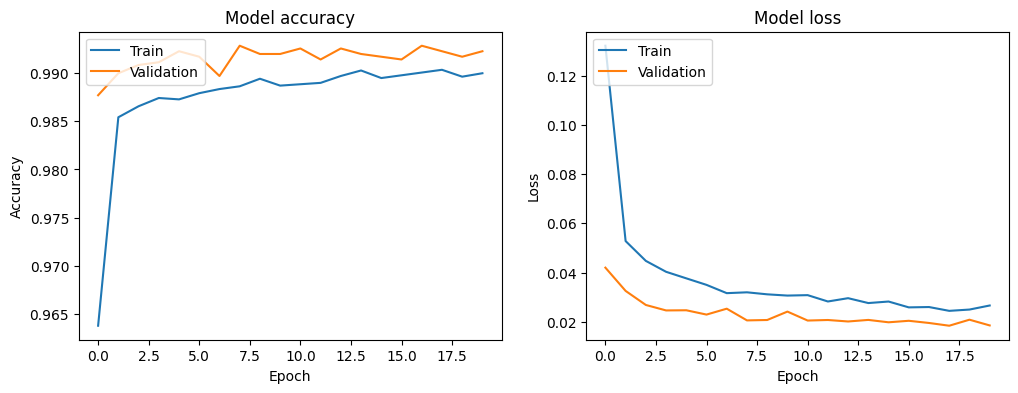

In [23]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy and loss for the best model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'])
plt.plot(best_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



### Model Architecture.

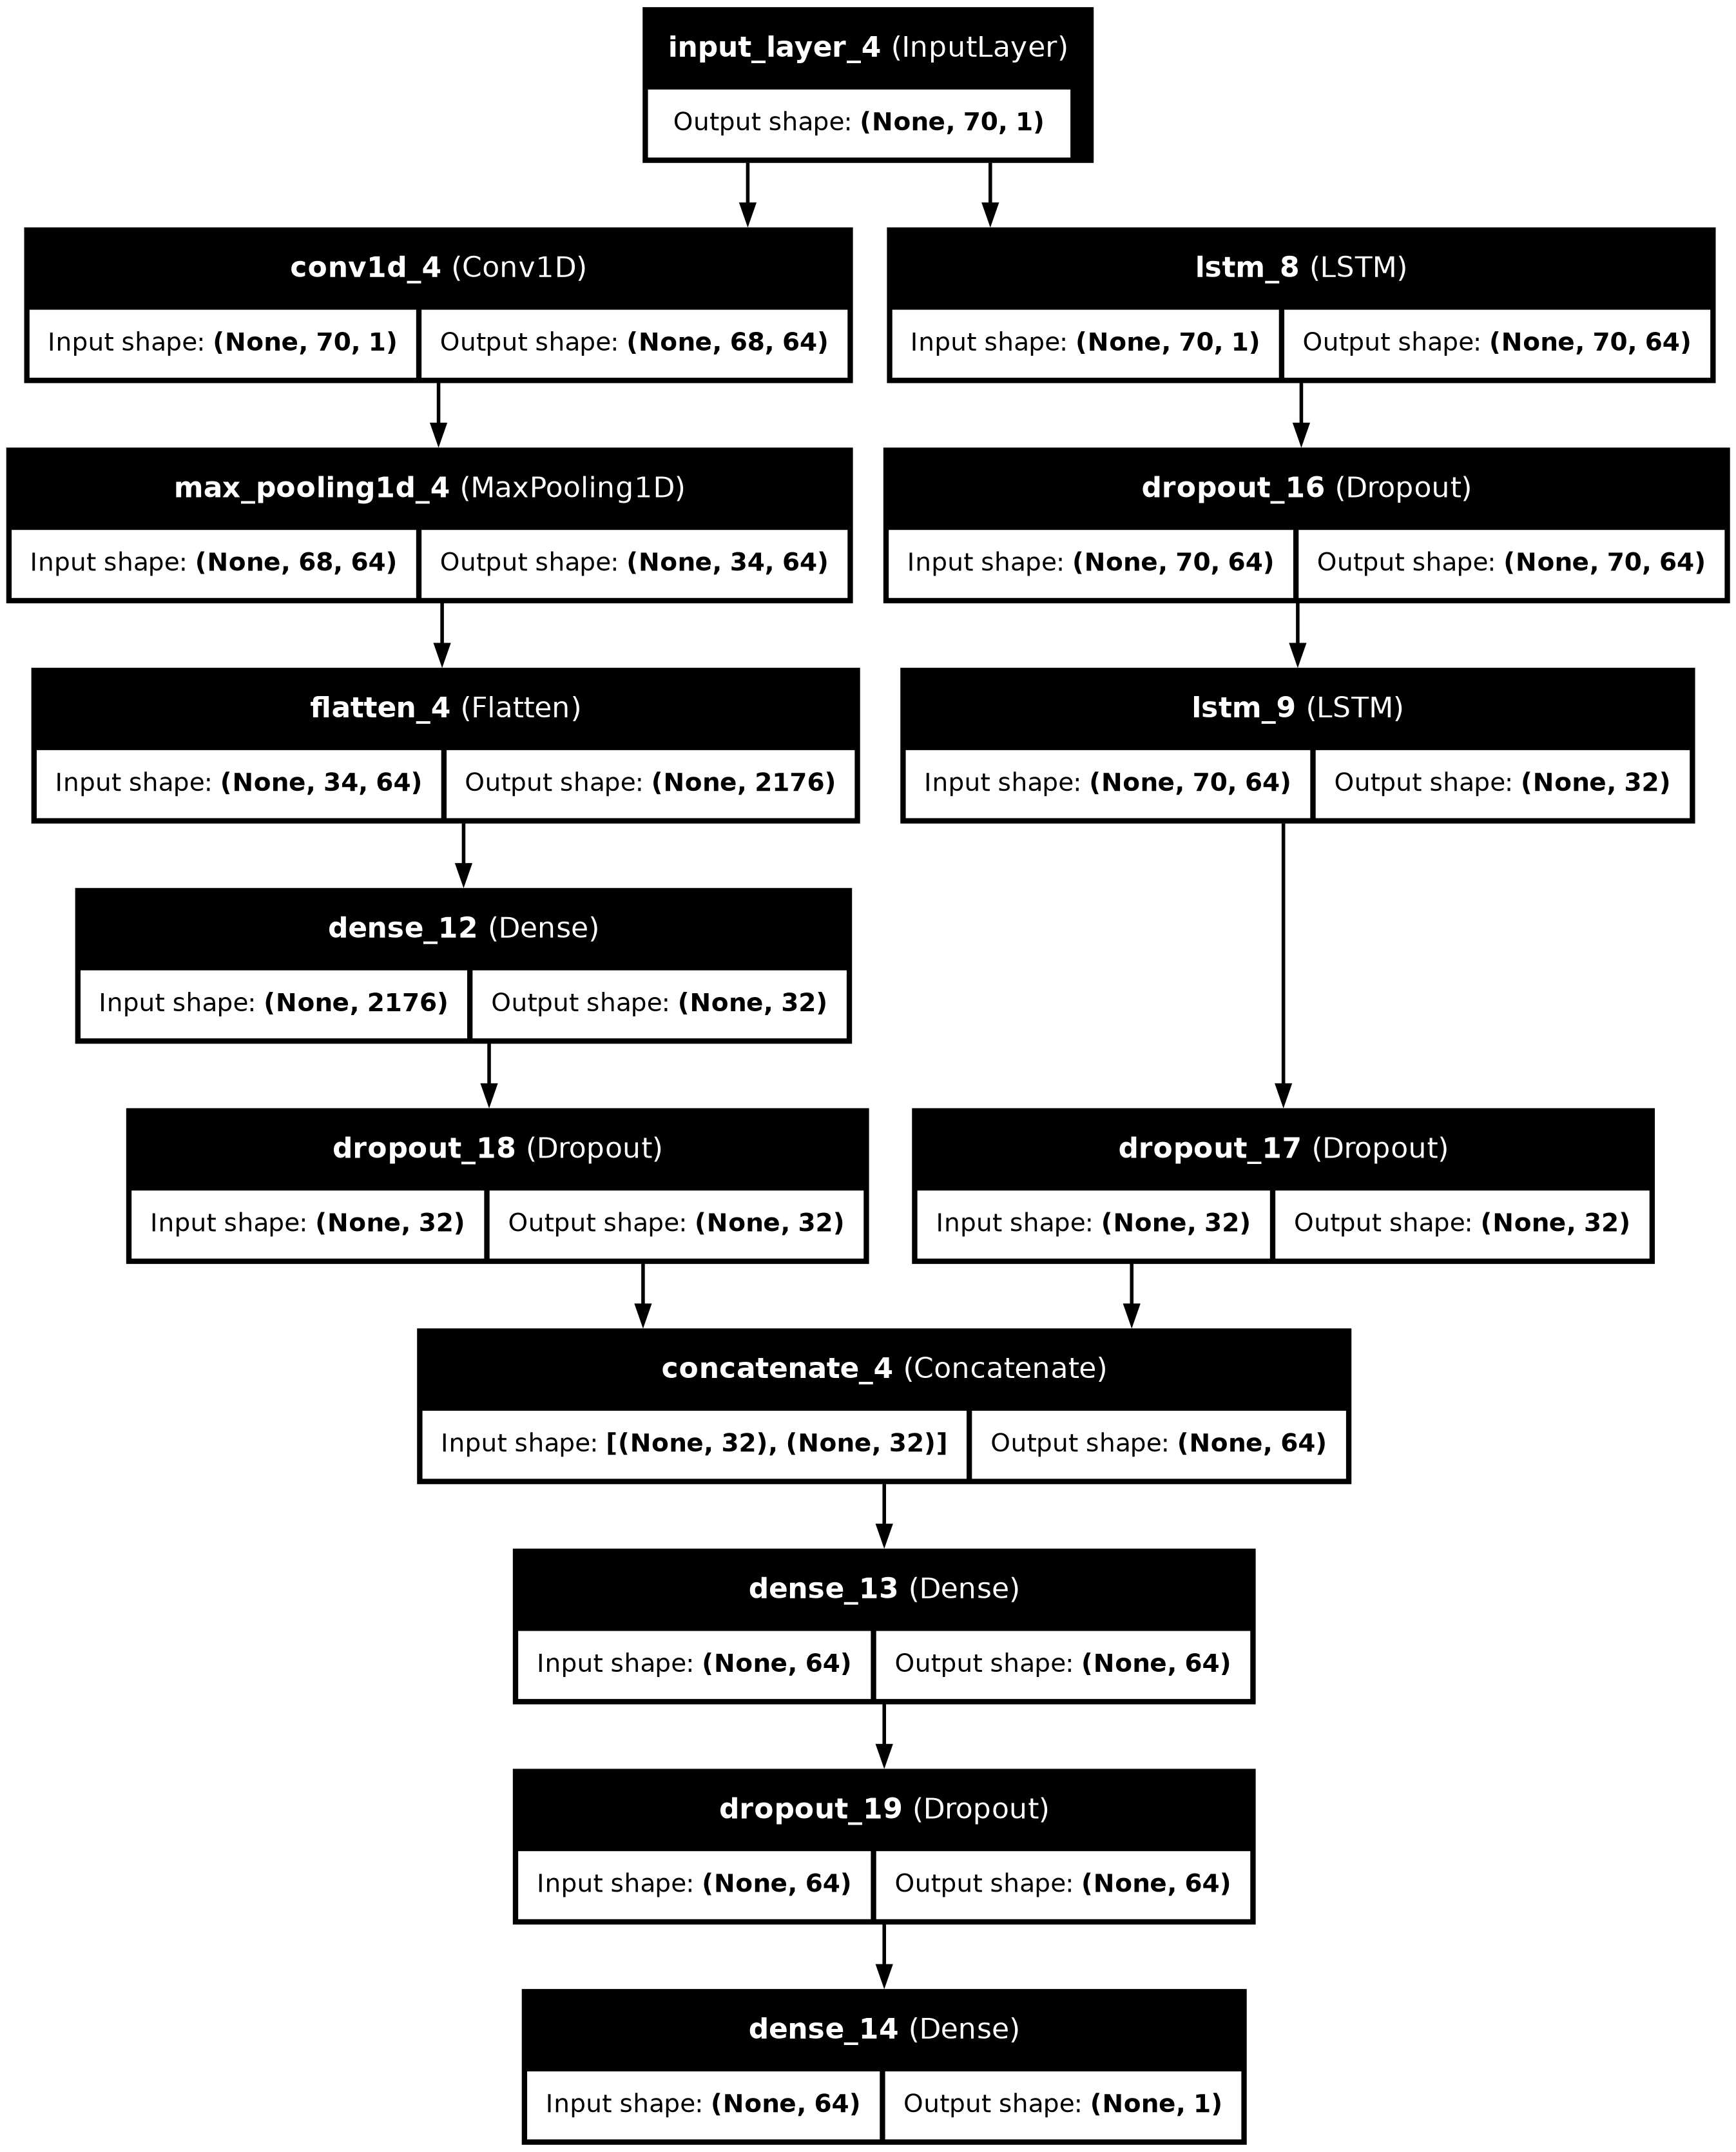

In [24]:
from keras.utils import plot_model
# Visualize the model architecture
plot_model(best_model, to_file='/kaggle/working/model_architecture.png', show_shapes=True, show_layer_names=True)

## Preparing Test Datasets.

In [25]:
import os
import pandas as pd
# Base directory where your dataset is stored
base_directory = '/kaggle/input/datp2020sets/test.csv'


# Load all CSV files from relevant weeks
dataframes = pd.read_csv(base_directory)



activity_counts = dataframes['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = dataframes['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)

Activity distribution:
Activity
BENIGN                    16842
Network Scan               7614
Web Vulnerability Scan     2574
Directory Bruteforce       1503
Normal                      535
Account Discovery           124
Account Bruteforce           50
Name: count, dtype: int64
Stage distribution:
Stage
BENIGN            16842
Reconnaissance    11865
Benign              535
Name: count, dtype: int64


### Target label

In [26]:
Y = dataframes['Stage'].apply(lambda x: 'Non-APT' if x == 'Benign' else 'APT')

# Check the distribution of the new label
print(Y.value_counts())

Stage
APT        28707
Non-APT      535
Name: count, dtype: int64


### Encoding targeted label.

In [27]:


from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = Y.values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y)



Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[0 0 0 ... 0 0 0]


### Timestamp feature extraction

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Convert the 'Timestamp' column to datetime
dataframes['Timestamp'] = pd.to_datetime(dataframes['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Extracting features from the datetime
dataframes['Year'] = dataframes['Timestamp'].dt.year
dataframes['Month'] = dataframes['Timestamp'].dt.month
dataframes['Day'] = dataframes['Timestamp'].dt.day
dataframes['Hour'] = dataframes['Timestamp'].dt.hour
dataframes['Minute'] = dataframes['Timestamp'].dt.minute
dataframes['Second'] = dataframes['Timestamp'].dt.second


# Selecting the columns to normalize
features_to_normalize = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the features
# df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# # Now df contains the normalized features which can be fed into your model
# print(df.head())

dtimestamp = dataframes[features_to_normalize]
dtimestamp


,Year,Month,Day,Hour,Minute,Second
0,2019,7,16,11,59,2
1,2019,7,16,11,59,9
2,2019,7,16,11,59,47
3,2019,7,16,12,2,19
4,2019,7,16,12,0,21
...,...,...,...,...,...,...
29237,2019,7,16,15,21,6
29238,2019,7,16,13,53,51
29239,2019,7,16,12,58,36
29240,2019,7,16,13,49,50


### IP feature conversion

In [29]:
import pandas as pd
import numpy as np
import ipaddress
# import category_encoders as ce

# Sample DataFrame for demonstration
# df_cleaned = pd.read_csv('your_dataset.csv')  # Assuming you load your data this way
non_numeric_columns = ["Src IP","Dst IP","Timestamp"]

# List of non-numeric columns

# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip = dataframes[["Src IP", "Dst IP"]].copy()

# Apply the function to IP columns
df_ip['Src IP'] = df_ip['Src IP'].apply(validate_and_convert_ip)
df_ip['Dst IP'] = df_ip['Dst IP'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip['Src IP'].fillna(-1, inplace=True)
df_ip['Dst IP'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = dataframes[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip

/tmp/ipykernel_34/1021049291.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip['Src IP'].fillna(-1, inplace=True)
/tmp/ipykernel_34/1021049291.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,Src IP,Dst IP
0,0.000000,1.000000
1,0.752564,0.933625
2,0.752564,0.139224
3,0.752564,0.140111
4,0.752564,0.093188
...,...,...
29237,0.752564,0.031373
29238,0.752564,0.031373
29239,0.752564,0.031373
29240,0.807849,0.752564


### Removing correlated features.

In [30]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_cleaned_corr = dataframes.drop(columns=["Flow ID","Src IP","Dst IP","Timestamp" , "Activity" , "Stage" ])
correlation_matrix = df_cleaned_corr.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than threshold (e.g., 0.95)
threshold = 0.95
correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop correlated features
df_uncorrelated = df_cleaned_corr.drop(columns=correlated_features)

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_uncorrelated.shape)

Shape of DataFrame after dropping correlated features: (29242, 64)


### Data Combination.

In [31]:
# Combine the encoded IP and non-IP columns with other numeric features
X_test = pd.concat([df_ip, dtimestamp, df_uncorrelated], axis=1)

# Check the resulting dataframe
X_test.head()

,Src IP,Dst IP,Year,Month,Day,Hour,Minute,Second,Src Port,Dst Port,...,Active Max,Active Min,Idle Mean,Idle Std,Year,Month,Day,Hour,Minute,Second
0,0.000000,1.000000,2019,7,16,11,59,2,68,67,...,0.0,0.0,0.000000e+00,0.000000e+00,2019,7,16,11,59,2
1,0.752564,0.933625,2019,7,16,11,59,9,53569,8662,...,5448741.0,64.0,1.525138e+07,5.298373e+06,2019,7,16,11,59,9
2,0.752564,0.139224,2019,7,16,11,59,47,44100,443,...,85221.0,84092.0,3.890854e+07,5.918482e+06,2019,7,16,11,59,47
3,0.752564,0.140111,2019,7,16,12,2,19,40260,80,...,0.0,0.0,0.000000e+00,0.000000e+00,2019,7,16,12,2,19
4,0.752564,0.093188,2019,7,16,12,0,21,46040,80,...,4736597.0,15742.0,1.019663e+07,6.411008e+04,2019,7,16,12,0,21


Scaling & sampling

In [32]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

scaler = MinMaxScaler()
X_pred = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

under_sampling = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5, n_jobs=None)

X_resampled_pred, Y_resampled_pred = under_sampling.fit_resample(X_pred, Y)

print(pd.Series(Y_resampled_pred).value_counts())
X_resampled_pred.shape

0    28707
1    28707
Name: count, dtype: int64


(57414, 72)

### Preparing for model.

In [33]:
import numpy as np


X_pred_lstm = X_resampled_pred.to_numpy()
X_pred_lstm = np.expand_dims(X_pred_lstm, axis=2) 

# Display the new shapes
print(f"Training set reshaped for LSTM: {X_resampled_pred.shape}")

Training set reshaped for LSTM: (57414, 72)


### Prediction

In [38]:
# Truncate the input sequences to the length expected by the model
X_pred_lstm_truncated = X_pred_lstm[:, :70, :]

# Verify the new shape
print("Truncated shape of X_pred_lstm:", X_pred_lstm_truncated.shape)

# Make predictions
Y_pred_lstm = best_model.predict(X_pred_lstm_truncated)

# Convert probabilities to binary labels
Y_pred_binary = (Y_pred_lstm > 0.5).astype(int)

# Display the predictions
print(Y_pred_binary)

Truncated shape of X_pred_lstm: (57414, 70, 1)
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


### Evaluation matrix.

Accuracy: 0.5666
Precision: 0.5413
Recall: 0.8740
F1-Score: 0.6685
Confusion Matrix:
[[ 7443 21264]
 [ 3617 25090]]


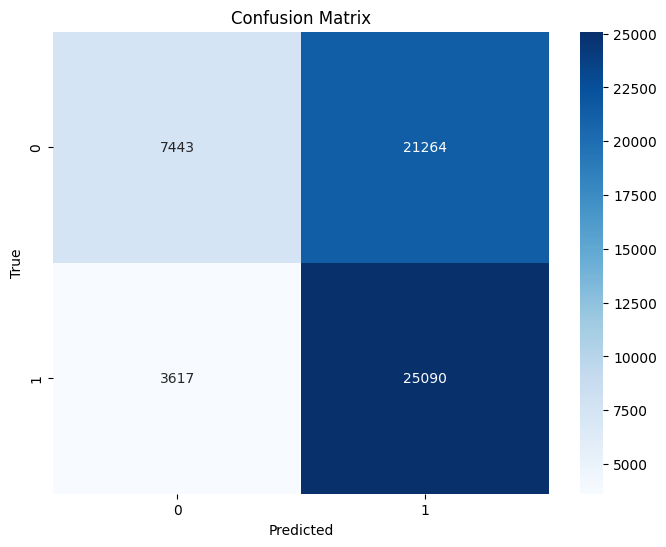

In [39]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_resampled_pred, Y_pred_binary )
precision = precision_score(Y_resampled_pred, Y_pred_binary )
recall = recall_score(Y_resampled_pred, Y_pred_binary )
f1 = f1_score(Y_resampled_pred, Y_pred_binary )
conf_matrix = confusion_matrix(Y_resampled_pred, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()